In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
file_path = 'wine-clustering.csv'
df = pd.read_csv(file_path)

In [4]:
print("Dataset Info:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None

Statistik Deskriptif:
          Alcohol  Malic_Acid       

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

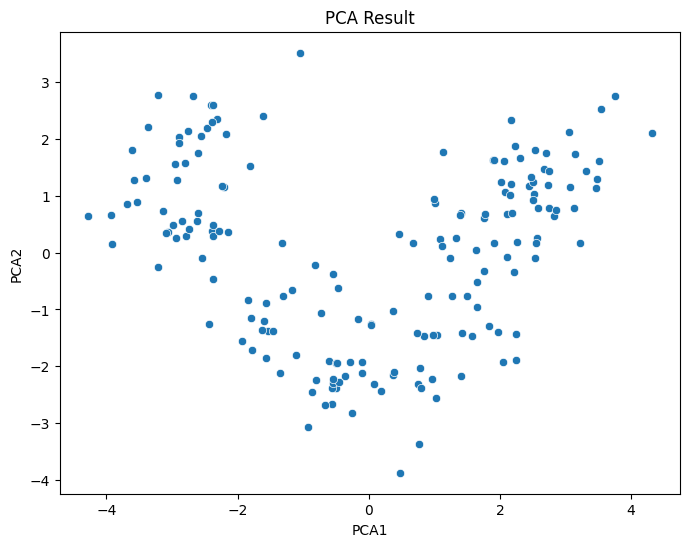

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'])
plt.title('PCA Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [9]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

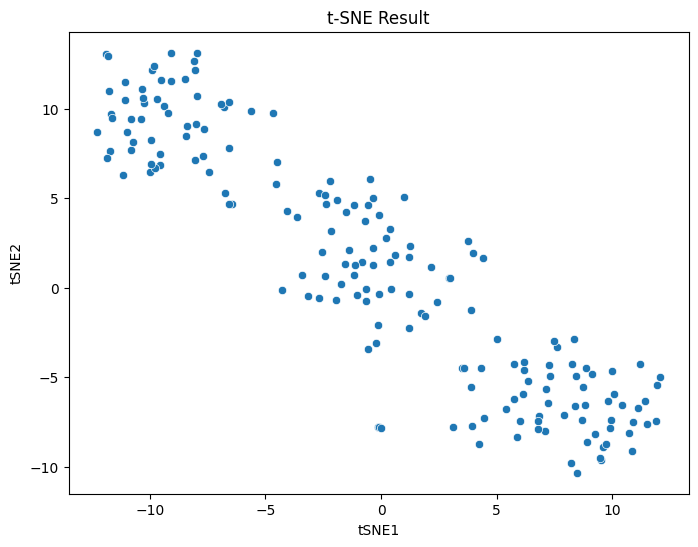

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['tSNE1'], y=df['tSNE2'])
plt.title('t-SNE Result')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

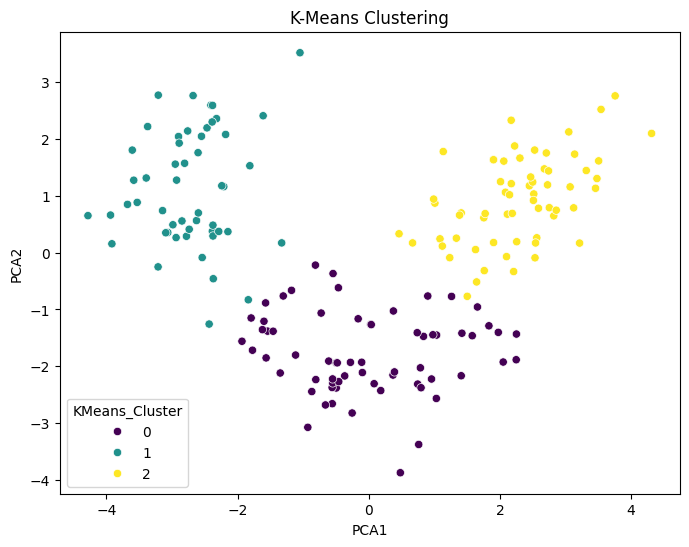

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [13]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

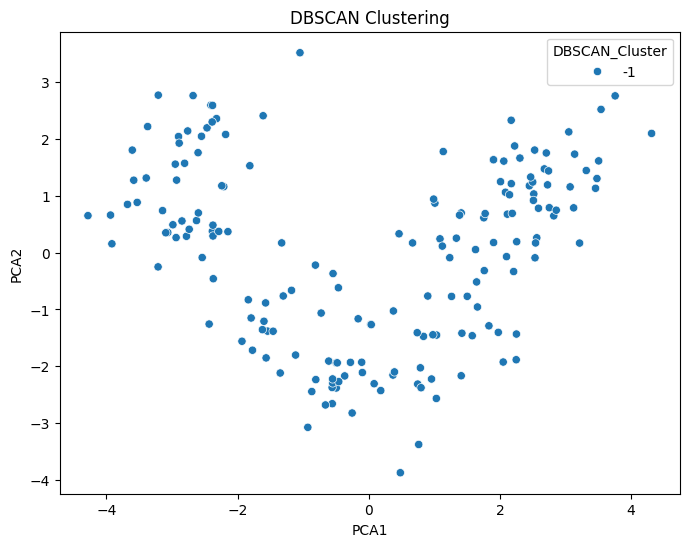

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [15]:
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(data_scaled)

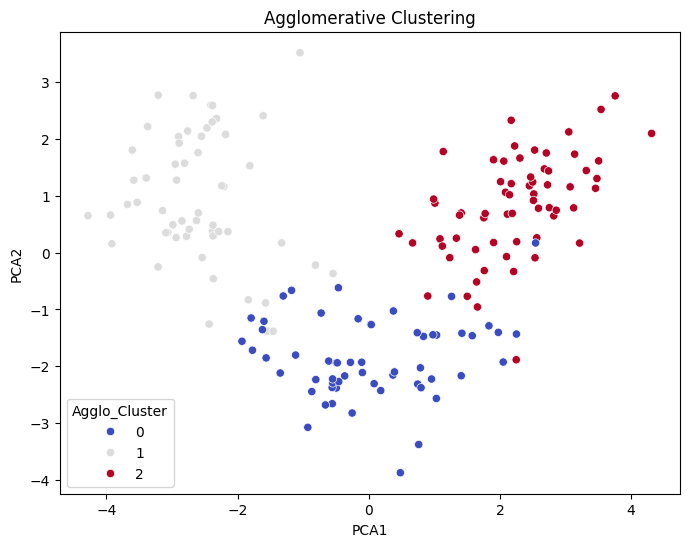

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Agglo_Cluster'], palette='coolwarm')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

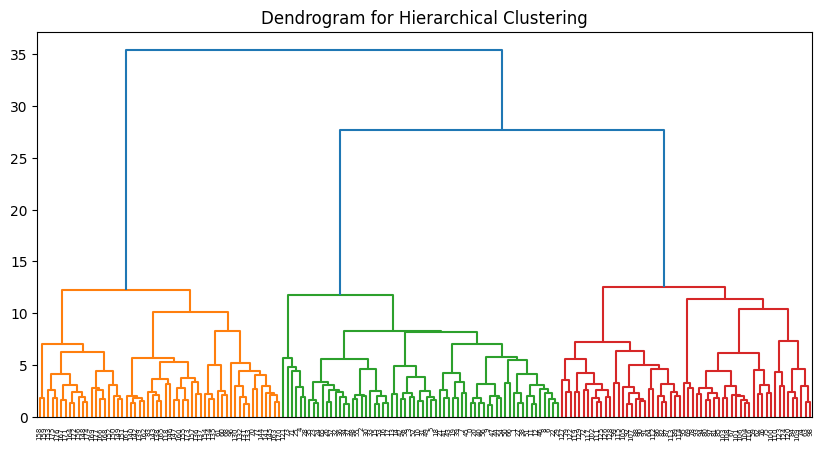

In [17]:
plt.figure(figsize=(10,5))
Z = linkage(data_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

Berdasarkan hasil analisis clustering dan dimensionality reduction pada Wine Clustering Dataset, ditemukan bahwa anggur dapat dikelompokkan berdasarkan karakteristik kimiawinya. Hasil K-Means clustering menunjukkan adanya tiga kelompok utama, yang mengindikasikan bahwa anggur dengan karakteristik serupa cenderung berada dalam kelompok yang sama. Hal ini bisa mencerminkan perbedaan dalam kualitas, rasa, atau bahkan jenis anggur berdasarkan komposisinya.

Hasil PCA menunjukkan bahwa dua komponen utama mampu menangkap sebagian besar variasi dalam data, yang membantu dalam memahami distribusi karakteristik anggur dalam ruang berdimensi rendah. Visualisasi dengan t-SNE semakin menegaskan bahwa terdapat beberapa kelompok yang berbeda dalam dataset, yang mungkin mengarah pada perbedaan kategori anggur seperti anggur merah, putih, atau variasi lainnya.

Selain itu, DBSCAN berhasil mengidentifikasi beberapa sampel anggur sebagai outlier, yang berarti anggur tersebut memiliki karakteristik yang berbeda secara signifikan dari kelompok utama. Ini bisa jadi menunjukkan anggur dengan komposisi unik atau anomali dalam proses produksi. Agglomerative Clustering dan analisis dendrogram lebih lanjut menunjukkan bagaimana anggur dikelompokkan berdasarkan kemiripan strukturalnya, di mana beberapa jenis anggur memiliki komposisi kimia yang lebih mirip dibandingkan dengan yang lain.

Dari hasil ini, dapat disimpulkan bahwa metode clustering dapat digunakan untuk mengelompokkan anggur berdasarkan komposisi kimianya, yang dapat membantu dalam kategorisasi anggur, analisis kualitas, serta optimasi proses produksi. Kelompok yang berbeda bisa memberikan wawasan tentang potensi perbedaan rasa, kualitas, atau bahkan harga di pasaran.